### Importing needed packages

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import copy

### Importing Dataset
Data consists of 15 Observations and is about whether a tennis match can be taken place regarding to weather conditions. 

In [5]:
dataset = pd.read_csv('tennis.csv')
print(dataset)

    day   outlook  temp humidity    wind play
0    D1     Sunny   Hot     High    Weak   No
1    D2     Sunny   Hot     High  Strong   No
2    D3  Overcast   Hot     High    Weak  Yes
3    D4      Rain  Mild     High    Weak  Yes
4    D5      Rain  Cool   Normal    Weak  Yes
5    D6      Rain  Cool   Normal  Strong   No
6    D7  Overcast  Cool   Normal  Strong  Yes
7    D8     Sunny  Mild     High    Weak   No
8    D9     Sunny  Cool   Normal    Weak  Yes
9   D10      Rain  Mild   Normal    Weak  Yes
10  D11     Sunny  Mild   Normal  Strong  Yes
11  D12  Overcast  Mild     High  Strong  Yes
12  D13  Overcast   Hot   Normal    Weak  Yes
13  D14      Rain  Mild     High  Strong   No


In [6]:
X = dataset.iloc[:, 1:].values
attribute = ['outlook', 'temp', 'humidity', 'wind']

## Initializing a Class 
* Note that here I used not so complex tree as it is time consuming and there are parts in coding that I do not clearly understand.
* Our function has 3 attributes. Values, Decisions and Childs.


In [7]:
class Node(object):
    def __init__(self):
        self.value = None
        self.decision = None
        self.childs = None


## Entropy & Information Gain

* Favors splits with small counts but many unique values.
* Weights probability of class by log(base=2) of the class probability
* A smaller value of Entropy is better.  That makes the difference between the parent node’s entropy larger.
* Information Gain is the Entropy of the parent node minus the entropy of the child nodes.
* Entropy is calculated [ P(class1)*log(P(class1),2) + P(class2)*log(P(class2),2) + … + P(classN)*log(P(classN),2)]

When you use Information Gain, which uses Entropy as the base calculation, you have a wider range of results.  The Gini Index caps at one.  The maximum value for Entropy depends on the number of classes.  It’s based on base-2, so if you have…
Two classes: Max entropy is 1.
Four Classes: Max entropy is 2.
Eight Classes: Max entropy is 3.
16 classes: Max entropy is 4.


In [8]:
def infGain(data, rows):
    yes = 0
    no = 0
    ans = -1
    idx = len(data[0]) - 1
    infgain = 0
    for i in rows:
        if data[i][idx] == 'Yes':
            yes = yes + 1
        else:
            no = no + 1

    x = yes/(yes+no)
    y = no/(yes+no)
    if x != 0 and y != 0:
        infgain = -1 * (x*math.log2(x) + y*math.log2(y))
    if x == 1:
        ans = 1
    if y == 1:
        ans = 0
    return infgain, ans

## Maxgain

### An attribute with highest Information gain will tested/split first


In [9]:
def findMaxGain(data, rows, columns):
    maxGain = 0
    retidx = -1
    infgain, ans = infGain(data, rows)
    if infgain == 0:
        """if ans == 1:
            print("Yes")
        else:
            print("No")"""
        return maxGain, retidx, ans

    for j in columns:
        mydict = {}
        idx = j
        for i in rows:
            key = data[i][idx]
            if key not in mydict:
                mydict[key] = 1
            else:
                mydict[key] = mydict[key] + 1
        gain = infgain

        # print(mydict)
        for key in mydict:
            yes = 0
            no = 0
            for k in rows:
                if data[k][j] == key:
                    if data[k][-1] == 'Yes':
                        yes = yes + 1
                    else:
                        no = no + 1
            # print(yes, no)
            x = yes/(yes+no)
            y = no/(yes+no)
            # print(x, y)
            if x != 0 and y != 0:
                gain += (mydict[key] * (x*math.log2(x) + y*math.log2(y)))/14
        # print(gain)
        if gain > maxGain:
            # print("hello")
            maxGain = gain
            retidx = j

    return maxGain, retidx, ans


## Building a Tree

In [10]:
def buildTree(data, rows, columns):

    maxGain, idx, ans = findMaxGain(X, rows, columns)
    root = Node()
    root.childs = []
    #print(maxGain)
    if maxGain == 0:
        if ans == 1:
            root.value = 'Yes'
        else:
            root.value = 'No'
        return root

    root.value = attribute[idx]
    mydict = {}
    for i in rows:
        key = data[i][idx]
        if key not in mydict:
            mydict[key] = 1
        else:
            mydict[key] += 1

    newcolumns = copy.deepcopy(columns)
    newcolumns.remove(idx)
    for key in mydict:
        newrows = []
        for i in rows:
            if data[i][idx] == key:
                newrows.append(i)
        #print(newrows)
        temp = buildTree(data, newrows, newcolumns)
        temp.decision = key
        root.childs.append(temp)
    return root

def traverse(root):
    print(root.decision)
    print(root.value)

    n = len(root.childs)
    if n > 0:
        for i in range(0, n):
            traverse(root.childs[i])



## Final Output

In [11]:
def calculate():
    rows = [i for i in range(0, 14)]
    columns = [i for i in range(0, 4)]
    root = buildTree(X, rows, columns)
    root.decision = 'Ստորև ներկայացված է Ծառը\n'
    traverse(root)

calculate()

Ստորև ներկայացված է Ծառը

outlook
Sunny
humidity
High
No
Normal
Yes
Overcast
Yes
Rain
wind
Weak
Yes
Strong
No


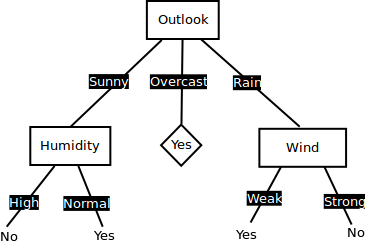